# Práctica 1

## **Análisis de Sentimientos en Español**


<h2> Utilizando un modelo previamente entrenado con Naive Bayes <h2/>

En este cuaderno se especifica la implementación de un análisis de sentimientos con un modelo preentrenado que utiliza, por detrás, Naive Bayes y TF-IDF para el preprocesamiento del texto. Hecho por Elliot Hofman: [REFERENCIA](https://github.com/el-cornetillo/senti-py)

In [23]:
#Instalar biblioteca para el análisis de sentimientos
!pip install sentiment-analysis-spanish

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 8.6 MB/s eta 0:00:00


In [24]:
#Instalar una biblioteca para aprendizaje automático
!pip install scikit-learn

In [25]:
# Importar la libreria
from sentiment_analysis_spanish import sentiment_analysis

# Instanciar el clasificador, esto puede demorar un poco
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Probamos con estas tres frases representativas:
- Positiva: "Esta muy buena esa pelicula" (esperamos una puntuación alta, cercana a 1).
- Negativa: "Que horrible comida!!!" (esperamos una puntuación baja, cercana a 0).
- Neutral: "Tuve una experiencia neutral" (esperamos una puntuación intermedia, cercana a 0.5).


In [26]:
#Frases para la prueba
x = "Esta muy buena esa pelicula"
y = "Que horrible comida!!!"
z = "Tuve una experiencia neutral"

Ejecutamos 3 ejemplos: uno de un mensaje positivo, uno de un mensaje negativo y otro de un mensaje neutral. Veremos cómo la librería detecta la polaridad de cada uno de estos mensajes.

In [27]:
#Prueba del eje x
sentiment.sentiment(x)

np.float64(0.9479949612434518)

In [28]:
#Prueba del eje y
sentiment.sentiment(y)

np.float64(0.0009285127385591881)

In [29]:
#Prueba del eje z
sentiment.sentiment(z)

np.float64(0.20714292719952648)

## Conclusiones
Esta aproximación es simple y eficiente para textos cortos en español, pero puede fallar en contextos sarcásticos o ambiguos. En prácticas futuras, podríamos entrenar un modelo personalizado para mejorar la precisión.

# Práctica 2

## Análisis Exploratorio de Datos con Pandas

## Objetivos

- Cargar y explorar el dataset de redes sociales.
- Limpiar, filtrar y transformar datos con Pandas.
- Realizar agregaciones y visualizaciones básicas.

## Qué hacemos

Cargamos `dataset.csv` y practicamos:
- `df.head()`, `df.info()`, `df.describe()`
- Manejo de nulos: `dropna()` y `fillna()`
- Filtros: `df[df["favorites"] > 400]`, `str.contains()`
- Nuevas columnas con `apply()` y funciones lambda
- Agrupaciones: `groupby("country").mean()`
- Gráficos rápidos: `df.plot(kind="scatter")`, `groupby().plot.bar()`
- Exportar resultados: `to_csv("salida.csv")`

In [30]:
#Importar libreria pandas
import pandas as pd

# Leer los datos y mostrarlos, con el index_col se quita el identificador
df = pd.read_csv("dataset.csv", index_col = "id")

df

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,ECUADOR,leonardokuffo,389.0,258
183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,BRASIL,mateusmartins,982.0,1822
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378
183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129
183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,BRASIL,mateusmartins,982.0,1822
183727,80's & friends! ✈️,158.0,40.0,22.0,ECUADOR,leonardokuffo,389.0,258
183728,Thank you guess how did I feel somewhat offend...,NaN,50.0,10.0,MEXICO,pedrojuarez,12.0,129
183729,OnePlus 8 international giveaway classifies,198.0,82.0,26.0,MEXICO,pedrojuarez,12.0,129


In [32]:
# Mostrar primeros 5 filas de datos
df.head()

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,ECUADOR,leonardokuffo,389.0,258
183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,BRASIL,mateusmartins,982.0,1822
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378
183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129


In [33]:
# Mostrar las ultimos 10 filas de datos
df.tail(10)

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183738,hmmm feeling bad today,296.0,93.0,29.0,MEXICO,gabrielcarvajal,21.0,2721
183739,not feeling god right now,315.0,26.0,10.0,ECUADOR,galocastillo,332.0,378
183740,Programming is a hot topic!,133.0,145.0,15.0,BRASIL,lucasperes,82.0,351
183741,Programming? i love it!,92.0,146.0,1.0,ECUADOR,galocastillo,332.0,378
183742,WHAT???,255.0,73.0,17.0,ECUADOR,galocastillo,332.0,378
183743,Amazing video by Leonardo!,432.0,95.0,18.0,BRASIL,lucasperes,82.0,351
183744,Thanks man!,430.0,143.0,28.0,BRASIL,lucasperes,NaN,351
183745,There is nothing better than programming!,424.0,110.0,29.0,BRASIL,lucasperes,82.0,351
183746,BORED AF,488.0,28.0,27.0,MEXICO,gabrielcarvajal,21.0,2721


In [34]:
# Calculos estadisticos descriptivos
df.describe()

,favorites,retweets,mentions,followers,followees
count,26.000000,26.000000,26.000000,26.000000,27.000000
mean,280.538462,80.000000,15.423077,352.807692,1190.185185
std,153.377242,40.303846,9.596554,375.319493,1965.735995
min,23.000000,21.000000,1.000000,12.000000,129.000000
25%,139.250000,45.500000,8.250000,21.000000,258.000000
50%,305.500000,79.000000,16.000000,332.000000,351.000000
75%,422.500000,110.750000,23.500000,389.000000,1822.000000
max,500.000000,146.000000,29.000000,982.000000,9918.000000


In [35]:
#Elimina filas con vacios
df_filtrado = df.dropna()
df_filtrado.head()

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378
183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129
183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,BRASIL,mateusmartins,982.0,1822
183727,80's & friends! ✈️,158.0,40.0,22.0,ECUADOR,leonardokuffo,389.0,258


In [36]:
#Llenar vacios
df_filtrado = df.fillna(0)
df_filtrado.head()

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,0.0,10.0,ECUADOR,leonardokuffo,389.0,258
183722,Today we commemorate and MNML Case.,500.0,21.0,0.0,BRASIL,mateusmartins,982.0,1822
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378
183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129


In [37]:
#Llenar vacios por dato
df_llenado = df.fillna({"retweets": 0, "mentions": -1})
df_llenado.head()

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,0.0,10.0,ECUADOR,leonardokuffo,389.0,258
183722,Today we commemorate and MNML Case.,500.0,21.0,-1.0,BRASIL,mateusmartins,982.0,1822
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378
183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129


In [38]:
#Filtrar datos
df_filtrado[["favorites", "full_text"]]

,favorites,full_text
id,,
183721,23.0,Flying home to run down from the power to comi...
183722,500.0,Today we commemorate and MNML Case.
183723,190.0,Today we have reached US$6.55 Billion TT$44…
183724,131.0,Faking It by Joel Atwell. Written by Other cou...
183725,113.0,Welcome back! 🙌
183726,492.0,Contest: Win a fan of his ass. #thatisall Thanks!
183727,158.0,80's & friends! ✈️
183728,0.0,Thank you guess how did I feel somewhat offend...
183729,198.0,OnePlus 8 international giveaway classifies


In [39]:
#Filtrar por filas
df_filtrado.iloc[[0,1,2]]

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,0.0,10.0,ECUADOR,leonardokuffo,389.0,258
183722,Today we commemorate and MNML Case.,500.0,21.0,0.0,BRASIL,mateusmartins,982.0,1822
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129


In [40]:
df_filtrado.loc[[183721, 183722], ["favorites", "full_text"]]

,favorites,full_text
id,,
183721,23.0,Flying home to run down from the power to comi...
183722,500.0,Today we commemorate and MNML Case.


In [41]:
#Filtrado por condiciones
df_filtrado[(df["favorites"] > 400 ) & (df["mentions"] > 20)]

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183744,Thanks man!,430.0,143.0,28.0,BRASIL,lucasperes,0.0,351
183745,There is nothing better than programming!,424.0,110.0,29.0,BRASIL,lucasperes,82.0,351
183746,BORED AF,488.0,28.0,27.0,MEXICO,gabrielcarvajal,21.0,2721


In [42]:
df_filtrado[df["full_text"].str.contains("Programming")]

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183733,Programming is the best!,467.0,69.0,10.0,ECUADOR,leonardokuffo,389.0,258
183740,Programming is a hot topic!,133.0,145.0,15.0,BRASIL,lucasperes,82.0,351
183741,Programming? i love it!,92.0,146.0,1.0,ECUADOR,galocastillo,332.0,378


In [43]:
import random
def calcularGanancias(retweets):
    ganancia = retweets * random.randint(3, 5)
    return ganancia
df_filtrado["ganancias"] = df["retweets"].apply(calcularGanancias)

df_filtrado.head(10)

,full_text,favorites,retweets,mentions,country,user,followers,followees,ganancias
id,,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,0.0,10.0,ECUADOR,leonardokuffo,389.0,258,NaN
183722,Today we commemorate and MNML Case.,500.0,21.0,0.0,BRASIL,mateusmartins,982.0,1822,84.0
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129,615.0
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378,228.0
183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129,520.0
183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,BRASIL,mateusmartins,982.0,1822,350.0
183727,80's & friends! ✈️,158.0,40.0,22.0,ECUADOR,leonardokuffo,389.0,258,160.0
183728,Thank you guess how did I feel somewhat offend...,0.0,50.0,10.0,MEXICO,pedrojuarez,12.0,129,150.0
183729,OnePlus 8 international giveaway classifies,198.0,82.0,26.0,MEXICO,pedrojuarez,12.0,129,246.0


In [44]:
def popularidad(fila):
  resultado = fila["followees"]/fila["followers"]
  return resultado

df_filtrado["popularidad"] = df.apply(popularidad, axis=1)
df_filtrado.head()
#

,full_text,favorites,retweets,mentions,country,user,followers,followees,ganancias,popularidad
id,,,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,0.0,10.0,ECUADOR,leonardokuffo,389.0,258,NaN,0.663239
183722,Today we commemorate and MNML Case.,500.0,21.0,0.0,BRASIL,mateusmartins,982.0,1822,84.0,1.855397
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129,615.0,10.750000
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378,228.0,1.138554
183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129,520.0,10.750000


In [45]:
df_filtrado.groupby("country").mean(numeric_only=True)

,favorites,retweets,mentions,followers,followees,ganancias,popularidad
country,,,,,,,
BRASIL,339.909091,91.272727,17.818182,560.545455,1889.363636,392.545455,3.708644
ECUADOR,186.375000,56.750000,11.875000,360.500000,318.000000,245.285714,0.900897
MEXICO,258.000000,77.750000,13.750000,15.375000,1101.000000,301.375000,55.308036


In [46]:
grouped = df_filtrado.groupby("country").agg({
    "followers": 'sum',
    "mentions": 'mean',
    "retweets": 'max'
})

grouped[grouped["followers"] > 5000]

,followers,mentions,retweets
country,,,
BRASIL,6166.0,17.818182,145.0


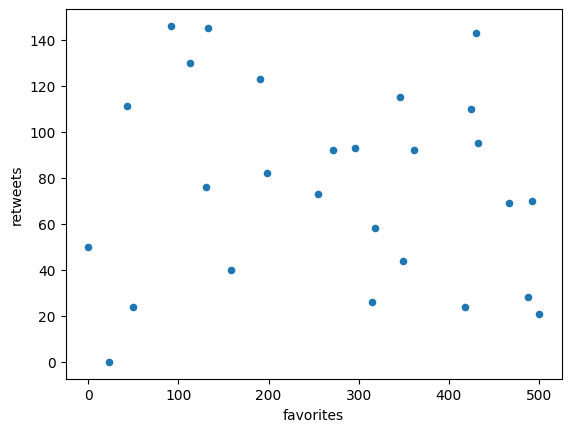

In [47]:
import matplotlib.pyplot as plt
df_filtrado.plot(kind="scatter", x="favorites", y="retweets")
plt.show()

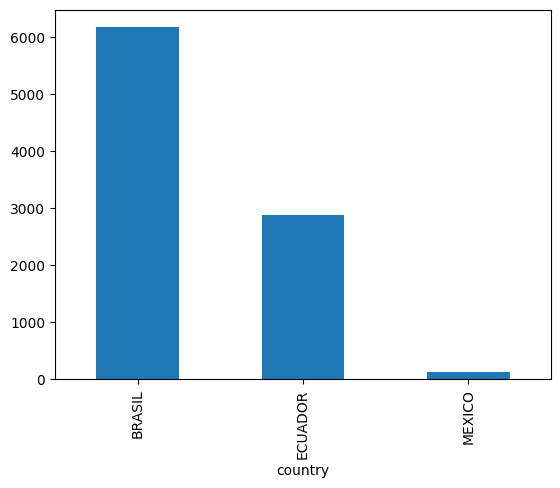

In [49]:
import matplotlib.pyplot as plt
grouped["followers"].plot(kind="bar")
plt.show()

In [50]:
import matplotlib.pyplot as plt
grouped.to_csv("salida.csv")

## Conclusión
Pandas permite hacer un EDA completo y rápido en minutos. Perfecto para datasets tabulares medianos.

# Práctica 3

## Joins, Fechas y Pivoteo Avanzado

## Objetivos
- Unir varios CSV con `merge()`
- Trabajar con fechas y extraer día/mes/año
- Reorganizar datos con `pivot`, `groupby` múltiple y `transpose`

## Qué hacemos
Usamos tres archivos relacionados (`dataset_2a.csv`, `2b.csv`, `2c.csv`):
1. Unimos tablas por usuario y ciudad (`how='left'left'`)
2. Convertimos strings a fechas: `pd.to_datetime()`
3. Extraemos mes y día de la semana
4. Agrupamos por mes + ciudad y contamos publicaciones
5. Pivotamos para tener ciudades como columnas
6. Limpiamos multiíndices y transponemos el resultado final

In [51]:
import pandas as pd

In [52]:
#carga de datos
df1 = pd.read_csv("dataset_2a.csv")
df2 = pd.read_csv("dataset_2b.csv")
df3 = pd.read_csv("dataset_2c.csv")

In [53]:
df1

,id,full_text,favorites,retweets,mentions,user,fecha_publicado
0,183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,leonardokuffo,27/01/2023
1,183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,mateusmartins,27/01/2023
2,183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,pedrojuarez,28/01/2023
3,183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,galocastillo,28/01/2023
4,183725,Welcome back! 🙌,113.0,130.0,9.0,pedrojuarez,28/01/2023
5,183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,mateusmartins,29/01/2023
6,183727,80's & friends! ✈️,158.0,40.0,22.0,leonardokuffo,29/01/2023
7,183728,Thank you guess how did I feel somewhat offend...,NaN,50.0,10.0,pedrojuarez,29/01/2023
8,183729,OnePlus 8 international giveaway classifies,198.0,82.0,26.0,pedrojuarez,30/01/2023
9,183730,Here it is.. Retweet this desperate,272.0,92.0,29.0,mateusmartins,31/01/2023


In [54]:
df2

,ciudad,followers,followees,user
0,GUAYAQUIL,389.0,258,leonardokuffo
1,SAO PAULO,982.0,1822,mateusmartins
2,OAXACA,12.0,129,pedrojuarez
3,QUITO,332.0,378,galocastillo
4,GUADALAJARA,21.0,2721,gabrielcarvajal
5,RIO DE JANEIRO,82.0,351,lucasperes
6,PORTO ALEGRE,928.0,9918,isabelladasilva


In [55]:
df3

,ciudad,pais
0,GUAYAQUIL,ECUADOR
1,RIO DE JANEIRO,BRASIL
2,GUADALAJARA,MEXICO
3,OAXACA,MEXICO
4,QUITO,ECUADOR
5,SAO PAULO,BRASIL
6,BELO HORIZONTE,BRASIL


In [56]:
#Hacer como un join para unir las dos tablas
df_con_usuarios = df1.merge(df2, on="user", how='left')
df_con_usuarios

,id,full_text,favorites,retweets,mentions,user,fecha_publicado,ciudad,followers,followees
0,183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,leonardokuffo,27/01/2023,GUAYAQUIL,389.0,258
1,183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,mateusmartins,27/01/2023,SAO PAULO,982.0,1822
2,183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,pedrojuarez,28/01/2023,OAXACA,12.0,129
3,183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,galocastillo,28/01/2023,QUITO,332.0,378
4,183725,Welcome back! 🙌,113.0,130.0,9.0,pedrojuarez,28/01/2023,OAXACA,12.0,129
5,183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,mateusmartins,29/01/2023,SAO PAULO,982.0,1822
6,183727,80's & friends! ✈️,158.0,40.0,22.0,leonardokuffo,29/01/2023,GUAYAQUIL,389.0,258
7,183728,Thank you guess how did I feel somewhat offend...,NaN,50.0,10.0,pedrojuarez,29/01/2023,OAXACA,12.0,129
8,183729,OnePlus 8 international giveaway classifies,198.0,82.0,26.0,pedrojuarez,30/01/2023,OAXACA,12.0,129
9,183730,Here it is.. Retweet this desperate,272.0,92.0,29.0,mateusmartins,31/01/2023,SAO PAULO,982.0,1822


In [57]:
df_completo = df_con_usuarios.merge(df3, on="ciudad", how='left')
df_completo

,id,full_text,favorites,retweets,mentions,user,fecha_publicado,ciudad,followers,followees,pais
0,183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,leonardokuffo,27/01/2023,GUAYAQUIL,389.0,258,ECUADOR
1,183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,mateusmartins,27/01/2023,SAO PAULO,982.0,1822,BRASIL
2,183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,pedrojuarez,28/01/2023,OAXACA,12.0,129,MEXICO
3,183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,galocastillo,28/01/2023,QUITO,332.0,378,ECUADOR
4,183725,Welcome back! 🙌,113.0,130.0,9.0,pedrojuarez,28/01/2023,OAXACA,12.0,129,MEXICO
5,183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,mateusmartins,29/01/2023,SAO PAULO,982.0,1822,BRASIL
6,183727,80's & friends! ✈️,158.0,40.0,22.0,leonardokuffo,29/01/2023,GUAYAQUIL,389.0,258,ECUADOR
7,183728,Thank you guess how did I feel somewhat offend...,NaN,50.0,10.0,pedrojuarez,29/01/2023,OAXACA,12.0,129,MEXICO
8,183729,OnePlus 8 international giveaway classifies,198.0,82.0,26.0,pedrojuarez,30/01/2023,OAXACA,12.0,129,MEXICO
9,183730,Here it is.. Retweet this desperate,272.0,92.0,29.0,mateusmartins,31/01/2023,SAO PAULO,982.0,1822,BRASIL


In [58]:
df_completo['fecha']= pd.to_datetime(df_completo['fecha_publicado'], format="%d/%m/%Y")
df_completo

,id,full_text,favorites,retweets,mentions,user,fecha_publicado,ciudad,followers,followees,pais,fecha
0,183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,leonardokuffo,27/01/2023,GUAYAQUIL,389.0,258,ECUADOR,2023-01-27
1,183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,mateusmartins,27/01/2023,SAO PAULO,982.0,1822,BRASIL,2023-01-27
2,183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,pedrojuarez,28/01/2023,OAXACA,12.0,129,MEXICO,2023-01-28
3,183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,galocastillo,28/01/2023,QUITO,332.0,378,ECUADOR,2023-01-28
4,183725,Welcome back! 🙌,113.0,130.0,9.0,pedrojuarez,28/01/2023,OAXACA,12.0,129,MEXICO,2023-01-28
5,183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,mateusmartins,29/01/2023,SAO PAULO,982.0,1822,BRASIL,2023-01-29
6,183727,80's & friends! ✈️,158.0,40.0,22.0,leonardokuffo,29/01/2023,GUAYAQUIL,389.0,258,ECUADOR,2023-01-29
7,183728,Thank you guess how did I feel somewhat offend...,NaN,50.0,10.0,pedrojuarez,29/01/2023,OAXACA,12.0,129,MEXICO,2023-01-29
8,183729,OnePlus 8 international giveaway classifies,198.0,82.0,26.0,pedrojuarez,30/01/2023,OAXACA,12.0,129,MEXICO,2023-01-30
9,183730,Here it is.. Retweet this desperate,272.0,92.0,29.0,mateusmartins,31/01/2023,SAO PAULO,982.0,1822,BRASIL,2023-01-31


In [59]:
df_completo['dia_semana'] = df_completo['fecha'].apply(lambda x: x.strftime('%A/%d/%B'))
df_completo

,id,full_text,favorites,retweets,mentions,user,fecha_publicado,ciudad,followers,followees,pais,fecha,dia_semana
0,183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,leonardokuffo,27/01/2023,GUAYAQUIL,389.0,258,ECUADOR,2023-01-27,Friday/27/January
1,183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,mateusmartins,27/01/2023,SAO PAULO,982.0,1822,BRASIL,2023-01-27,Friday/27/January
2,183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,pedrojuarez,28/01/2023,OAXACA,12.0,129,MEXICO,2023-01-28,Saturday/28/January
3,183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,galocastillo,28/01/2023,QUITO,332.0,378,ECUADOR,2023-01-28,Saturday/28/January
4,183725,Welcome back! 🙌,113.0,130.0,9.0,pedrojuarez,28/01/2023,OAXACA,12.0,129,MEXICO,2023-01-28,Saturday/28/January
5,183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,mateusmartins,29/01/2023,SAO PAULO,982.0,1822,BRASIL,2023-01-29,Sunday/29/January
6,183727,80's & friends! ✈️,158.0,40.0,22.0,leonardokuffo,29/01/2023,GUAYAQUIL,389.0,258,ECUADOR,2023-01-29,Sunday/29/January
7,183728,Thank you guess how did I feel somewhat offend...,NaN,50.0,10.0,pedrojuarez,29/01/2023,OAXACA,12.0,129,MEXICO,2023-01-29,Sunday/29/January
8,183729,OnePlus 8 international giveaway classifies,198.0,82.0,26.0,pedrojuarez,30/01/2023,OAXACA,12.0,129,MEXICO,2023-01-30,Monday/30/January
9,183730,Here it is.. Retweet this desperate,272.0,92.0,29.0,mateusmartins,31/01/2023,SAO PAULO,982.0,1822,BRASIL,2023-01-31,Tuesday/31/January


In [60]:
df_completo['mes'] = df_completo['fecha'].apply(lambda x: x.strftime('%m/%Y'))
df_completo

,id,full_text,favorites,retweets,mentions,user,fecha_publicado,ciudad,followers,followees,pais,fecha,dia_semana,mes
0,183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,leonardokuffo,27/01/2023,GUAYAQUIL,389.0,258,ECUADOR,2023-01-27,Friday/27/January,01/2023
1,183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,mateusmartins,27/01/2023,SAO PAULO,982.0,1822,BRASIL,2023-01-27,Friday/27/January,01/2023
2,183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,pedrojuarez,28/01/2023,OAXACA,12.0,129,MEXICO,2023-01-28,Saturday/28/January,01/2023
3,183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,galocastillo,28/01/2023,QUITO,332.0,378,ECUADOR,2023-01-28,Saturday/28/January,01/2023
4,183725,Welcome back! 🙌,113.0,130.0,9.0,pedrojuarez,28/01/2023,OAXACA,12.0,129,MEXICO,2023-01-28,Saturday/28/January,01/2023
5,183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,mateusmartins,29/01/2023,SAO PAULO,982.0,1822,BRASIL,2023-01-29,Sunday/29/January,01/2023
6,183727,80's & friends! ✈️,158.0,40.0,22.0,leonardokuffo,29/01/2023,GUAYAQUIL,389.0,258,ECUADOR,2023-01-29,Sunday/29/January,01/2023
7,183728,Thank you guess how did I feel somewhat offend...,NaN,50.0,10.0,pedrojuarez,29/01/2023,OAXACA,12.0,129,MEXICO,2023-01-29,Sunday/29/January,01/2023
8,183729,OnePlus 8 international giveaway classifies,198.0,82.0,26.0,pedrojuarez,30/01/2023,OAXACA,12.0,129,MEXICO,2023-01-30,Monday/30/January,01/2023
9,183730,Here it is.. Retweet this desperate,272.0,92.0,29.0,mateusmartins,31/01/2023,SAO PAULO,982.0,1822,BRASIL,2023-01-31,Tuesday/31/January,01/2023


In [61]:
df_completo['mes'] = df_completo['fecha_publicado'].apply(lambda x: x[3:])
df_completo

,id,full_text,favorites,retweets,mentions,user,fecha_publicado,ciudad,followers,followees,pais,fecha,dia_semana,mes
0,183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,leonardokuffo,27/01/2023,GUAYAQUIL,389.0,258,ECUADOR,2023-01-27,Friday/27/January,01/2023
1,183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,mateusmartins,27/01/2023,SAO PAULO,982.0,1822,BRASIL,2023-01-27,Friday/27/January,01/2023
2,183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,pedrojuarez,28/01/2023,OAXACA,12.0,129,MEXICO,2023-01-28,Saturday/28/January,01/2023
3,183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,galocastillo,28/01/2023,QUITO,332.0,378,ECUADOR,2023-01-28,Saturday/28/January,01/2023
4,183725,Welcome back! 🙌,113.0,130.0,9.0,pedrojuarez,28/01/2023,OAXACA,12.0,129,MEXICO,2023-01-28,Saturday/28/January,01/2023
5,183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,mateusmartins,29/01/2023,SAO PAULO,982.0,1822,BRASIL,2023-01-29,Sunday/29/January,01/2023
6,183727,80's & friends! ✈️,158.0,40.0,22.0,leonardokuffo,29/01/2023,GUAYAQUIL,389.0,258,ECUADOR,2023-01-29,Sunday/29/January,01/2023
7,183728,Thank you guess how did I feel somewhat offend...,NaN,50.0,10.0,pedrojuarez,29/01/2023,OAXACA,12.0,129,MEXICO,2023-01-29,Sunday/29/January,01/2023
8,183729,OnePlus 8 international giveaway classifies,198.0,82.0,26.0,pedrojuarez,30/01/2023,OAXACA,12.0,129,MEXICO,2023-01-30,Monday/30/January,01/2023
9,183730,Here it is.. Retweet this desperate,272.0,92.0,29.0,mateusmartins,31/01/2023,SAO PAULO,982.0,1822,BRASIL,2023-01-31,Tuesday/31/January,01/2023


In [62]:
agrupado = df_completo.groupby(['mes', 'ciudad']).agg({
    'id': 'count'
    })
agrupado

id
mes     ciudad            
01/2023 GUAYAQUIL        2
        OAXACA           4
        QUITO            1
        SAO PAULO        5
02/2023 GUADALAJARA      2
        GUAYAQUIL        2
        OAXACA           1
        QUITO            3
        RIO DE JANEIRO   4
03/2023 GUADALAJARA      1
        PORTO ALEGRE     1
        RIO DE JANEIRO   1

In [63]:
desagrupado = agrupado.reset_index(1)
desagrupado

,ciudad,id
mes,,
01/2023,GUAYAQUIL,2
01/2023,OAXACA,4
01/2023,QUITO,1
01/2023,SAO PAULO,5
02/2023,GUADALAJARA,2
02/2023,GUAYAQUIL,2
02/2023,OAXACA,1
02/2023,QUITO,3
02/2023,RIO DE JANEIRO,4


In [64]:
desagrupado[['ciudad']]

,ciudad
mes,
01/2023,GUAYAQUIL
01/2023,OAXACA
01/2023,QUITO
01/2023,SAO PAULO
02/2023,GUADALAJARA
02/2023,GUAYAQUIL
02/2023,OAXACA
02/2023,QUITO
02/2023,RIO DE JANEIRO


In [65]:
pivote= desagrupado.pivot(columns='ciudad')
pivote = pivote.droplevel(0, axis='columns')
pivote

ciudad,GUADALAJARA,GUAYAQUIL,OAXACA,PORTO ALEGRE,QUITO,RIO DE JANEIRO,SAO PAULO
mes,,,,,,,
01/2023,NaN,2.0,4.0,NaN,1.0,NaN,5.0
02/2023,2.0,2.0,1.0,NaN,3.0,4.0,NaN
03/2023,1.0,NaN,NaN,1.0,NaN,1.0,NaN


In [66]:
pivote[['GUAYAQUIL']]

ciudad,GUAYAQUIL
mes,
01/2023,2.0
02/2023,2.0
03/2023,NaN


In [67]:
pivote = pivote.fillna(0)
pivote

ciudad,GUADALAJARA,GUAYAQUIL,OAXACA,PORTO ALEGRE,QUITO,RIO DE JANEIRO,SAO PAULO
mes,,,,,,,
01/2023,0.0,2.0,4.0,0.0,1.0,0.0,5.0
02/2023,2.0,2.0,1.0,0.0,3.0,4.0,0.0
03/2023,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [68]:
pivote.transpose()

mes,01/2023,02/2023,03/2023
ciudad,,,
GUADALAJARA,0.0,2.0,1.0
GUAYAQUIL,2.0,2.0,0.0
OAXACA,4.0,1.0,0.0
PORTO ALEGRE,0.0,0.0,1.0
QUITO,1.0,3.0,0.0
RIO DE JANEIRO,0.0,4.0,1.0
SAO PAULO,5.0,0.0,0.0


## Conclusión
Con `merge`, `pivot` y buen manejo de fechas podemos convertir datos dispersos en tablas listas para reporting o dashboard.

# Práctica 4

## Visualización de Datos – Titanic

## Objetivos
- Comparar Matplotlib, Seaborn y Pandas para plots básicos y avanzados.
- Crear gráficos de barras, histogramas y scatters desde agregaciones.

## Qué hacemos
Con el dataset `titanic.csv`:
- Agrupamos y contamos por 'Sex', 'Survived', 'Pclass' (ej. groupby().agg('count')).
- Graficamos conteos por sexo de 3 formas:

   • Pandas: pasajeros.plot.bar(width=0.3, title='Pasajeros por Sexo').

   • Seaborn: sns.barplot(x='Sex', y='PassengerId', palette='Blues').

   • Matplotlib: plt.bar(pasajeros2['Sex'], pasajeros2['PassengerId'], color='green').
   
- Añadimos nuevas vizualizaciones: Histogramas de 'Age' (plt.hist() o sns.histplot()), scatters de 'Fare' vs 'Age' (plt.scatter() o sns.scatterplot()).
- Ajustamos títulos, colores, etiquetas y tamaños para cada uno.

In [69]:
!pip install pandas

In [70]:
!pip install matplotlib

In [71]:
!pip install seaborn

In [72]:
!pip install plotly

In [74]:
import pandas as pd

In [75]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [76]:
pasajeros = df.groupby('Sex').agg({
    'PassengerId': 'count'
})
pasajeros

,PassengerId
Sex,
female,314
male,577


<Axes: title={'center': 'Numero de Pasajeros por sexo'}, xlabel='Sex'>

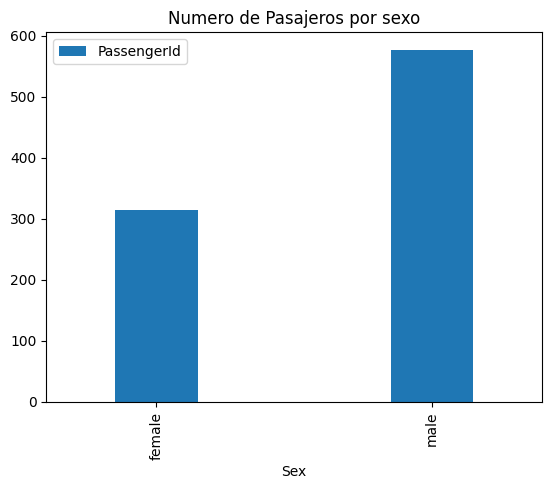

In [77]:
pasajeros.plot.bar(
    y = 'PassengerId',
    width = 0.3,
    title = 'Numero de Pasajeros por sexo'
)

In [78]:
import seaborn as sns

In [79]:
pasajeros2 = pasajeros.reset_index()
pasajeros2

,Sex,PassengerId
0,female,314
1,male,577


<Axes: xlabel='Sex', ylabel='PassengerId'>

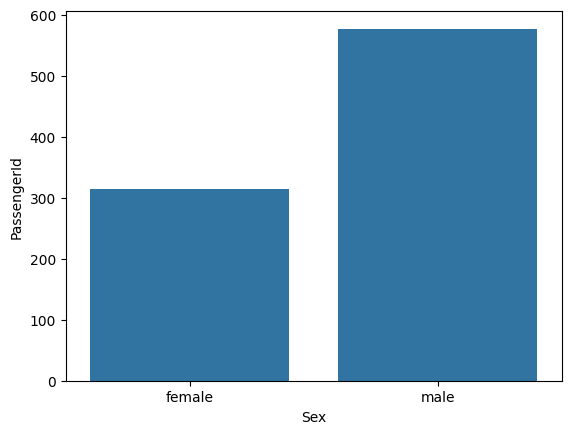

In [80]:
sns.barplot(
    pasajeros2,
    x='Sex',
    y='PassengerId'
)

In [81]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

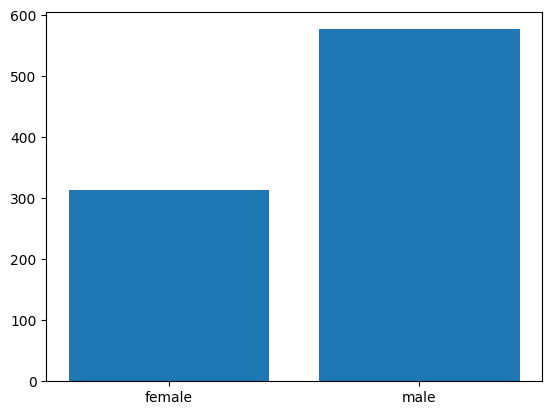

In [82]:
plt.bar(
    pasajeros2['Sex'],
    pasajeros2['PassengerId']
)

<Axes: ylabel='PassengerId'>

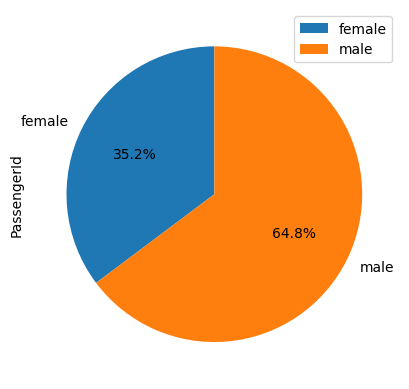

In [83]:
#Grafico de pie
pasajeros.plot.pie(
    y = 'PassengerId',
    startangle=90,
    autopct='%1.1f%%'
)

In [84]:
import plotly.express as px

In [85]:
fig = px.pie(
    pasajeros2,
    names='Sex',
    values='PassengerId',
    title='Proporción de pasajeros del Titanic por sexo'
)
fig.show()

In [86]:
clase = df.groupby('Pclass').agg({
    'PassengerId': 'count'
})
clase

,PassengerId
Pclass,
1,216
2,184
3,491


In [87]:
clase2 = clase.reset_index()
clase2

,Pclass,PassengerId
0,1,216
1,2,184
2,3,491


<Axes: ylabel='PassengerId'>

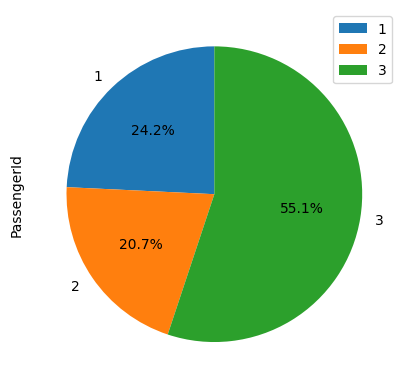

In [88]:
#Grafico de pie para Pclass
clase.plot.pie(
    y = 'PassengerId',
    startangle=90,
    autopct='%1.1f%%'
)

In [89]:
#Grafico de  pie para Pclass
fig = px.pie(
    clase2,
    names='Pclass',
    values='PassengerId',
    title='Proporción de pasajeros del Titanic por sexo',
    hole=0.5
)
fig.show()

In [90]:
df= df.dropna(subset=['Age'], axis='index')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: title={'center': 'Age'}, xlabel='Sex'>

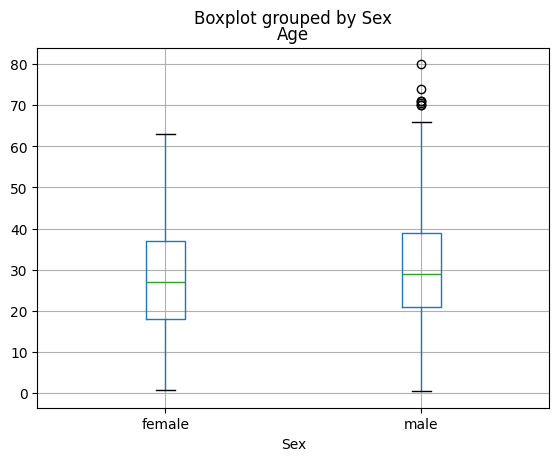

In [91]:
df.boxplot(
    column='Age',
    by = 'Sex'
)

<Axes: xlabel='Sex', ylabel='Age'>

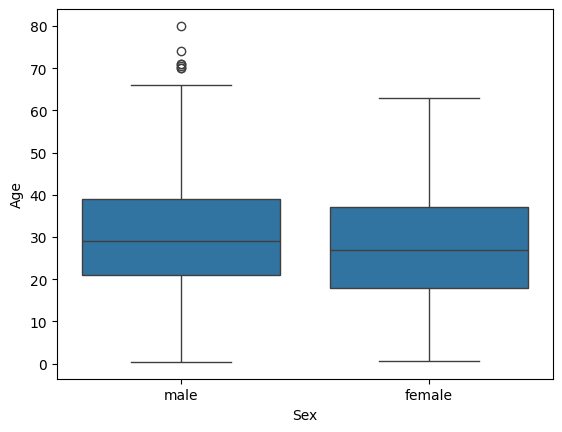

In [92]:
sns.boxplot(
    df,
    x='Sex',
    y='Age'
)

<Axes: xlabel='Sex', ylabel='Age'>

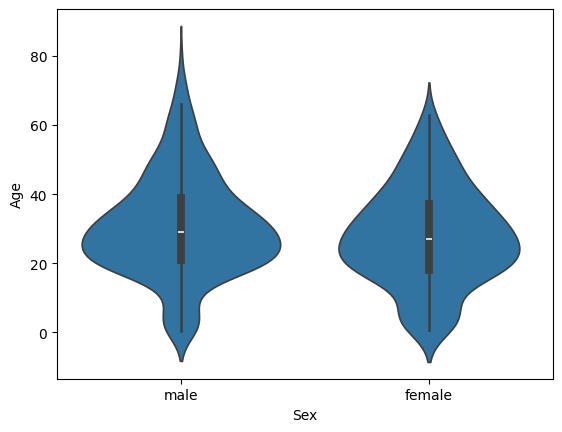

In [93]:
sns.violinplot(
    df,
    x='Sex',
    y='Age'
    #inner= 'point'
)

array([<Axes: title={'center': 'female'}>,
       <Axes: title={'center': 'male'}>], dtype=object)

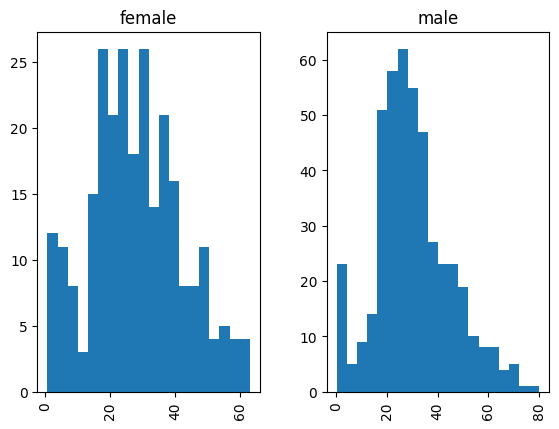

In [95]:
df.hist(
    'Age',
    by='Sex',
    bins= 20
)

<Axes: xlabel='Age', ylabel='Count'>

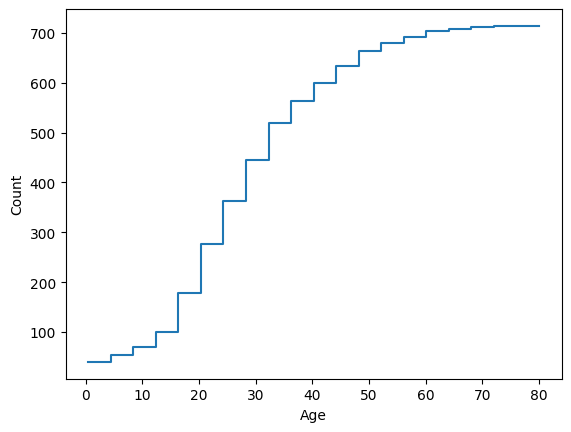

In [96]:
sns.histplot(
    df,
    x='Age',
    cumulative=True,
    #kde=True,
    bins=20,
    fill=False,
    element="step"
    #hue='Sex'
)

# Conclusión
Seaborn destaca en estética y facilidad para distribuciones complejas, Pandas para plots rápidos directos del DataFrame, Matplotlib para personalización total. Con estas, cubres EDA visual completo – barras para categorías, hists para distribuciones, scatters para relaciones.